<a href="https://colab.research.google.com/github/kevinmisoi/Data-science-prep-Week-4-indipendent-project-Kevin-Misoi-2021-11-Python-notebook/blob/main/Kevin_Misoi's_Moringa_School_Prep_W4_IP_2021_11_Python_ipynb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MORINGA PREP DATA SCIENCE PROJECT WEEK 4
In this week's independent project, you will be working as a data scientist working for an electric car-sharing service company. You have been tasked to process stations data to understand electric car usage over time.

By answering the following questions youll be able to achieve the main objective of the project:

1)Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

OBJECTIVE

Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.

**Dataset provided
1)http://bit.ly/autolib_dataset**

2)https://drive.google.com/a/moringaschool.com/file/d/13DXF2CFWQLeYxxHFekng8HJnH_jtbfpN/view?usp=sharing

**Importing the dataset**

In [3]:
#Importing libraries to be used
import pandas as pd
import numpy as np


**LOADING AND PREVIEWING THE DATASET**

In [4]:
Autolib_dataset=pd.read_csv("/content/Autolib_dataset (2).csv")
Autolib_dataset
Autolib_dataset.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [5]:
#Showing the info about the given dataset and the number of rows and columns it contains
#Also shows us the datatype and the memory of the whole dataset

Autolib_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [6]:
#Describing columns that we have.
Autolib_dataset.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'Displayed comment', 'ID', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [7]:
# Getting the sum of null values in each column
Autolib_dataset.isnull().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

Displayed comment column has 4889 null values and the scheduled at column has 4953 null values.

In [8]:
#Getting the shape of the dataframe
Autolib_dataset.shape

(5000, 25)

The data frame has 25 columns and 5000 rows.



In [9]:
#Checking the size of the dataframe
Autolib_dataset.size

125000

In [10]:
# Displaying some summary statistics of the dataframe
Autolib_dataset.describe(include = 'all')

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,111,5000,5000,5000,5000.000000,5000,5000,47,5000.000000,5000,5000,5000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
unique,1104,NaN,NaN,NaN,NaN,NaN,3,88,25,1105,4,1105,NaN,1105,4,8,NaN,3,3,3,NaN,NaN,NaN,NaN,NaN
top,8 Avenue de la Porte de Montrouge,NaN,NaN,NaN,NaN,NaN,nonexistent,Paris,"Station en parking (niv -2), accÃ¨s 4 av. Foch",paris-portedemontrouge-8,STATION,"48.8230593, 2.322823",NaN,Paris/Porte de Montrouge/8,operational,2016-07-27T15:32:21,NaN,station,ok,nonexistent,NaN,NaN,NaN,NaN,NaN
freq,13,NaN,NaN,NaN,NaN,NaN,2886,2816,8,13,4388,13,NaN,13,4618,10,NaN,4615,4623,4593,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.333600,2.333600,0.059600,0.123000,0.253400,NaN,NaN,NaN,NaN,NaN,NaN,82634.878400,NaN,NaN,NaN,1.932400,NaN,NaN,NaN,2018.0,4.0,4.941600,11.509200,29.270000
std,NaN,2.035274,2.035274,0.246698,0.356506,0.546304,NaN,NaN,NaN,NaN,NaN,NaN,8835.865721,NaN,NaN,NaN,1.905402,NaN,NaN,NaN,0.0,0.0,2.597063,6.893549,17.231741
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,75001.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,2018.0,4.0,1.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,75012.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,2018.0,4.0,3.000000,6.000000,14.000000
50%,NaN,2.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,75019.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,2018.0,4.0,5.000000,11.000000,29.000000
75%,NaN,4.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,92320.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,2018.0,4.0,7.000000,18.000000,44.000000


In [11]:
#checking for unique values
Autolib_dataset.nunique()

Address                1104
Cars                      8
Bluecar counter           8
Utilib counter            3
Utilib 1.4 counter        4
Charge Slots              3
Charging Status           3
City                     88
Displayed comment        25
ID                     1105
Kind                      4
Geo point              1105
Postal code             107
Public name            1105
Rental status             4
Scheduled at              8
Slots                     8
Station type              3
Status                    3
Subscription status       3
year                      1
month                     1
day                       9
hour                     24
minute                   60
dtype: int64

Shows the unique values of each column.

***DATA CLEANING***

Finding outliers


In [12]:
 # Importing the required library required in visualising outliers.
 import matplotlib.pyplot as plt 
% matplotlib inline
import seaborn as sns 


Plotting boxplots to check for outliers

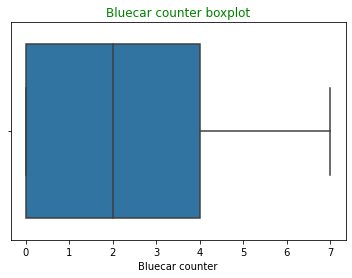

In [13]:
#plotting the Bluecounter boxplot
sns.boxplot(x = Autolib_dataset['Bluecar counter'])
plt.title('Bluecar counter boxplot', color = 'g')
plt.show()

There is no outlier in the bluecounter boxplot

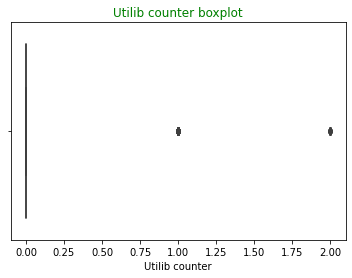

In [14]:
# plotting the Utilib counter boxplot
sns.boxplot(x = Autolib_dataset['Utilib counter'])
plt.title('Utilib counter boxplot', color = 'g')
plt.show()

 lots of outliers present in the utilib counter boxplot.

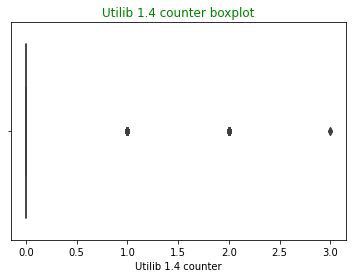

In [15]:
# plotting the Utilib 1.4 counter boxplot
sns.boxplot(x = Autolib_dataset['Utilib 1.4 counter'])
plt.title('Utilib 1.4 counter boxplot', color = 'g')
plt.show()

lots of outliers present in the utilib 1.4 counter boxplot.

**Using Inter Quantile Range to drop outliers**

In [16]:
#Calculating our first, third quantiles and then later our IQR
Q1 = Autolib_dataset.quantile(0.25)
Q3 = Autolib_dataset.quantile(0.75)
IQR = Q3 - Q1

In [17]:
#Removing outliers based on the IQR range.
Autolib_dataset = Autolib_dataset[~((Autolib_dataset < (Q1 - 1.5 * IQR)) | (Autolib_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
# Checking the shape of the dataframe after dropping outliers
Autolib_dataset.shape

(3317, 25)

In [19]:
#Confirming whether the Cars column holds the same data as the Blue counter column
#If yes the cars column will be dropped  because it is redundant.
Autolib_dataset[ ~(Autolib_dataset.Cars == Autolib_dataset['Bluecar counter'])]



,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute


**Identifying duplicated rows**

In [20]:
 #Checking for and displaying duplicated rows in our table
Autolib_dataset[Autolib_dataset.duplicated()]
Autolib_dataset = Autolib_dataset.drop_duplicates()


In [21]:
#checking for the shape of the dataframe without duplicated rows if any.
Autolib_dataset.shape

(3317, 25)

This means there were no duplicated rows.

**Dropping irrelevant columns for this case scenario**

In [22]:
#listing all the columns in our dataset
Autolib_dataset.columns

Index(['Address', 'Cars', 'Bluecar counter', 'Utilib counter',
       'Utilib 1.4 counter', 'Charge Slots', 'Charging Status', 'City',
       'Displayed comment', 'ID', 'Kind', 'Geo point', 'Postal code',
       'Public name', 'Rental status', 'Scheduled at', 'Slots', 'Station type',
       'Status', 'Subscription status', 'year', 'month', 'day', 'hour',
       'minute'],
      dtype='object')

In [23]:
# A list of irrelevant columns to be dropped
columns_to_drop = ['Address', 'Cars', 'Displayed comment', 'ID', 'Geo point', 'Charge Slots',\
                         'Charging Status', 'Rental status', 'Scheduled at', 'Slots', 'Station type', \
                         'Subscription status', 'year', 'month', 'day', 'minute']

In [24]:
# Dropping the columns
Autolib_dataset.drop(columns_to_drop, inplace  = True, axis = 1)

In [25]:
#Confirming if the irrelevant columns have been dropped.
Autolib_dataset.columns

Index(['Bluecar counter', 'Utilib counter', 'Utilib 1.4 counter', 'City',
       'Kind', 'Postal code', 'Public name', 'Status', 'hour'],
      dtype='object')

They have been dropped


**Checking for unique elements in columns with texts to ensure there are no typos.**

In [26]:
#Identyfying columns to check
Columns_to_check = ['City', 'Kind', 'Public name', 'Status']


In [27]:
#Checking for unique elements in each column of those columns.
for col in Columns_to_check:
    print(Autolib_dataset[col].unique())

['Paris' 'Puteaux' 'Fontenay-aux-Roses' 'Le Chesnay' 'Versailles'
 'Malakoff' 'Issy-les-Moulineaux' 'Saint-Cloud' 'Nanterre' 'Bezons'
 'Nogent-sur-Marne' 'CrÃ©teil' 'Villejuif' 'Villeneuve-la-Garenne'
 'Montreuil' 'Charenton-le-Pont' 'Rueil-Malmaison' 'Courbevoie'
 'AsniÃ¨res-sur-Seine' 'Garches' 'Drancy' 'VerriÃ¨res-le-Buisson'
 'Le Blanc-Mesnil' 'La Garenne-Colombes' 'Vanves' 'Enghien-les-Bains'
 'Boulogne-Billancourt' 'ChÃ¢tenay-Malabry' 'Pantin' 'Meudon' 'Rungis'
 'Suresnes' 'Colombes' 'Bourg-la-Reine' 'BiÃ¨vres' 'Alfortville'
 'Champigny-sur-Marne' 'Aulnay-sous-bois' 'Saint-Denis'
 'Le Plessis-Robinson' 'Cachan' 'Gennevilliers' 'Le PrÃ©-Saint-Gervais'
 'Clamart' 'Bois-Colombes' 'Guyancourt' 'Bagnolet' 'Vaucresson'
 'Limeil-BrÃ©vannes' 'Romainville' 'VÃ©lizy-Villacoublay'
 'Fontenay-Sous-Bois' 'SÃ¨vres' 'Saint-Ouen' 'Clichy la garenne'
 'Clichy-la-Garenne' "Ville-d'Avray" 'Noisy-le-Sec' 'Le Bourget'
 'Saint-MandÃ©' 'Neuilly-sur-Seine' 'Clichy-sous-Bois' 'Montfermeil'
 'Bagneux' 'Ch

**Checking for and replacing null values**

In [28]:
#Checking for null values in the table
Autolib_dataset.isnull().sum()

Bluecar counter       0
Utilib counter        0
Utilib 1.4 counter    0
City                  0
Kind                  0
Postal code           0
Public name           0
Status                0
hour                  0
dtype: int64

In [29]:
#renaming columns appropriately

In [30]:
Autolib_dataset.columns = Autolib_dataset.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('.', '')


In [31]:
#confirmng that the dataframe columns have been renamed appriopriately
Autolib_dataset.columns

Index(['bluecar_counter', 'utilib_counter', 'utilib_14_counter', 'city',
       'kind', 'postal_code', 'public_name', 'status', 'hour'],
      dtype='object')

Adding a usage column for the three car counters i.e bluecar_counter,utilib_counter and utilib_14_counter.
positive number means that a car was returned,
negative number means that a car was picked,
zero means that nothing happened, i.e no car was picked nor returned

In [32]:
# creating column for bluecar usage
Autolib_dataset['usage_blue'] = Autolib_dataset.bluecar_counter.diff()

In [33]:
# creating column for utilib usage
Autolib_dataset['usage_utilib'] =Autolib_dataset.utilib_counter.diff()

In [34]:
# creating column for utilib 14 usage
Autolib_dataset['usage_utilib_14'] = Autolib_dataset.utilib_14_counter.diff()


In [35]:
Autolib_dataset.head()

,bluecar_counter,utilib_counter,utilib_14_counter,city,kind,postal_code,public_name,status,hour,usage_blue,usage_utilib,usage_utilib_14
0,0,0,0,Paris,STATION,75015,Paris/Suffren/2,ok,11,NaN,NaN,NaN
1,6,0,0,Paris,STATION,75014,Paris/Raymond Losserand/145,ok,7,6.0,0.0,0.0
4,3,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,ok,17,-3.0,0.0,0.0
5,0,0,0,Paris,STATION,75011,Paris/Voltaire/8,ok,7,-3.0,0.0,0.0
6,0,0,0,Paris,PARKING,75015,Paris/CitroÃ«n CÃ©vennes/Parking,closed,18,0.0,0.0,0.0


### **Question 1**

In [36]:
#What is the most popular hour for returning cars?
# Identifying the most popular hour of the day for picking up a shared electric car (Bluecar)
# in the city of Paris over the month of April 2018
# Usage is negative when picking up cars
Autolib_dataset[(Autolib_dataset.city == 'Paris') & (Autolib_dataset.usage_blue < 0)].groupby('hour')['hour'].count().sort_values(ascending = False).head(1)

hour
16    48
Name: hour, dtype: int64

Hour 16 is the most popular hour for picking cars

# **Question 2**

# **Question 3**

In [37]:
##What postal code is the most popular for picking up Bluecars? Does the most popular station belong to that postal code?
#Overall?
#At the most popular picking hour?
# Identifying the station that is the most popular overall
#
Autolib_dataset[(Autolib_dataset.kind == 'STATION') & (Autolib_dataset.status == 'ok')].groupby('public_name')[['kind']].count().sort_values(by = 'kind', ascending  = False).head(1)


,kind
public_name,
Fontenay-aux-Roses/Robert Marchand/32,10


# **Question 4**

In [38]:
# Identifying the postal code which is the most popular for picking up Bluecars - overall
# Usage is negative when picking up cars
#
Autolib_dataset[Autolib_dataset.usage_blue < 0].groupby('postal_code').count()[['usage_blue']].sort_values(by = 'usage_blue', ascending = False).head(1)

,usage_blue
postal_code,
75015,68


In [39]:
##Identifying the postal code which is the most popular for picking up Bluecars 
#At the most popular picking hour
# Usage is negative when picking up cars
#
Autolib_dataset[(Autolib_dataset.usage_blue < 0) & (Autolib_dataset.hour == 16)].groupby('postal_code').count()[['usage_blue']].sort_values(by = 'usage_blue', ascending = False).head(1)

,usage_blue
postal_code,
75020,7


# **Question 5**

In [40]:
##Do the results change if you consider Utilib and Utilib 1.4 instead of Bluecars? 
# Checking whether the utilib_counter had any picking or returning of cars
Autolib_dataset.usage_utilib.unique()

array([nan,  0.])

Utilib_counter did not have any activity of picking or dropping of cars Probably its because this column had so many outliers, which were removed during the cleaning process.

In [41]:
# Checking whether the utilib_14 had any picking or returning of cars
Autolib_dataset.usage_utilib_14.unique()

array([nan,  0.])

Also Utilib_14 counter did not have any activity of picking or dropping of cars Probably its because this column had so many outliers, which were removed during the cleaning process.